<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
# Loading the csv file
sat_scores = '../project-2/sat_scores.csv'

# Using pandas to read the csv file, separating the output by ','
sat_score = pd.read_csv(sat_scores, sep=',')

# Output produces an additional column with all NaN values. 
# Dropping the entire column
sat_score = sat_score.dropna(axis=1, how='all')
sat_score.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
# Not sure how to do with this method
# satscoredict = []
# with open('../project-2/sat_scores.csv') as t:
#    reader = csv.reader(t)
#    for row in reader:
#        satscoredict.append(row)

# satscoredict

# Managed to produce the desired outcome but converted it a dictionary from a dataframe
satscore_dict = sat_score.to_dict(orient='list')
satscore_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'Verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  56

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# Making a pandas DataFrame object with the SAT dictionary
satscoredf = pd.DataFrame(satscore_dict)
satscoredf.head(3)

# Dtypes are - State: object, Rate: int64, Verbal: int64, Math, int64
satscoredf.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
# Making a pandas Dataframe with .read_csv()
sat_scores = '../project-2/sat_scores.csv'
sat_score = pd.read_csv(sat_scores, sep=',')
sat_score = sat_score.dropna(axis=1, how='all')
sat_score.head()

# Dtypes are - State: object, Rate: int64, Verbal: int64, Math, int64
sat_score.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
# Our data is split into 4 columns
# State refers to each of the 50 states in the United States
# Rate refers to participation rate for each state
# Verbal refers to the average score for the verbal component in that particular state
# Math refers to the average score for the math component in that particular state
# In sum, the data is about the average SAT scores across all states in the United States
sat_score.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
# Creating the data dictionary containing 3 columns:
# Variable Name, Description, Variable Type
datadict = {'Variable Name': ['State', 'Rate', 'Verbal', 'Math'], 'Description': ['State within the US', 'SAT participation rate within each state', 'Verbal component average score', 'Math Component average score'],
            'Variable Type': ['Object', 'Integer', 'Integer', 'Integer']}

# Converting the data dictionary into a dataframe
datadictdf = pd.DataFrame(datadict)
datadictdf

# Joining the data dictionary to the right of the sat_score dataframe
satscore_with_datadict = pd.concat([sat_score, datadictdf], axis=1)
satscore_with_datadict.head(4)

,State,Rate,Verbal,Math,Variable Name,Description,Variable Type
0,CT,82,509,510,State,State within the US,Object
1,NJ,81,499,513,Rate,SAT participation rate within each state,Integer
2,MA,79,511,515,Verbal,Verbal component average score,Integer
3,NY,77,495,505,Math,Math Component average score,Integer


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0, 0.5, 'Number of States')

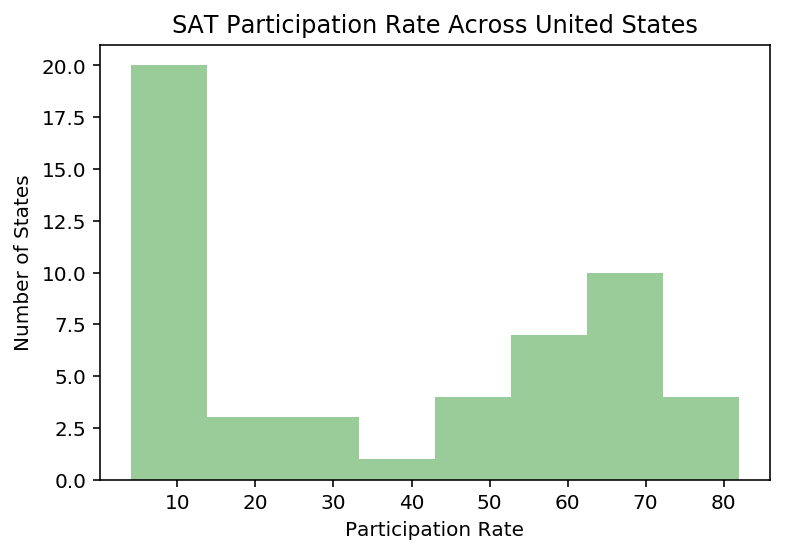

In [9]:
# Plotting the distribution for Rate
sns.distplot(sat_score['Rate'], kde=False, bins=8, color='g')
plt.title("SAT Participation Rate Across United States")
plt.xlabel("Participation Rate")
plt.ylabel("Number of States")

Text(0, 0.5, 'Number of States')

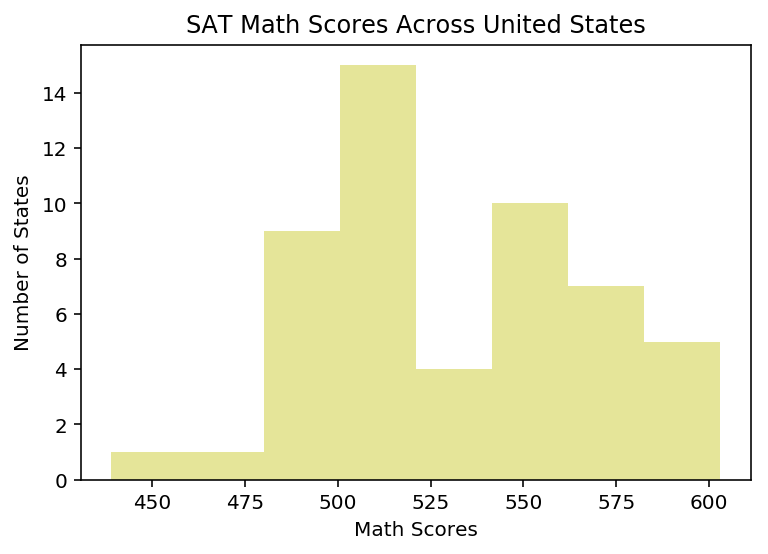

In [10]:
# Plotting the distribution for Math
sns.distplot(sat_score['Math'], kde=False, bins=8, color='y')
plt.title("SAT Math Scores Across United States")
plt.xlabel("Math Scores")
plt.ylabel("Number of States")

Text(0, 0.5, 'Number of States')

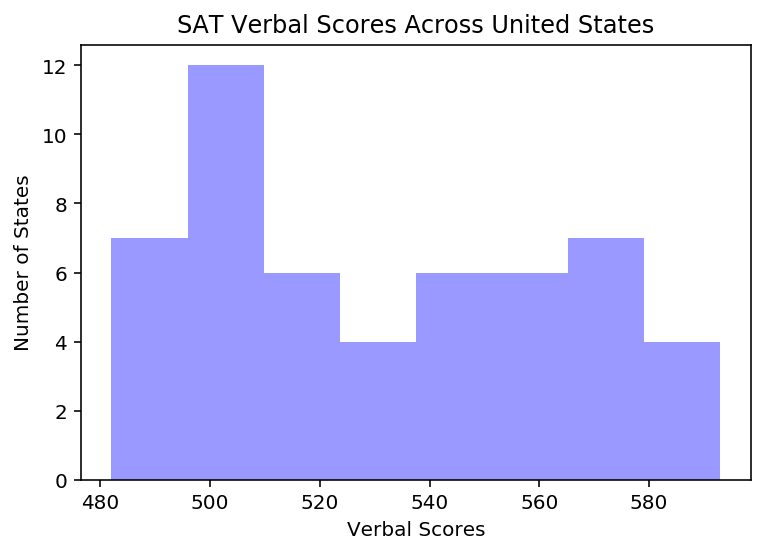

In [11]:
# Plotting the distribution for Verbal
sns.distplot(sat_score['Verbal'], kde=False, bins=8, color='b')
plt.title("SAT Verbal Scores Across United States")
plt.xlabel("Verbal Scores")
plt.ylabel("Number of States")

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

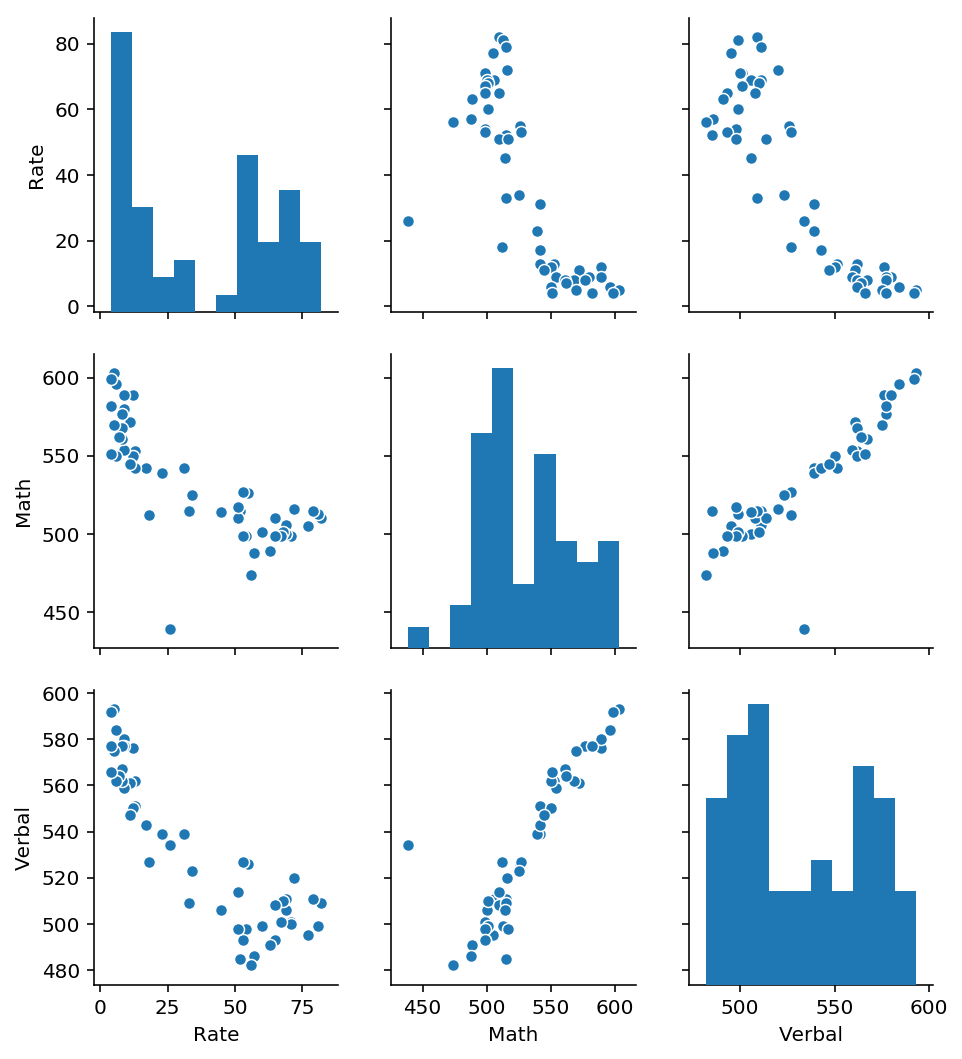

In [12]:
sns.pairplot(sat_score[['Rate', 'Math', 'Verbal']], height=2.5, aspect=0.9)
# 1 There is a positive correlation between peformance in math and verbal
# 2 States that did well in verbal also did well in math
# 3 States with higher participation rate tended to fare more poorly than states with lower participation rate
# for both math and verbal.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5, 0, 'Scores')

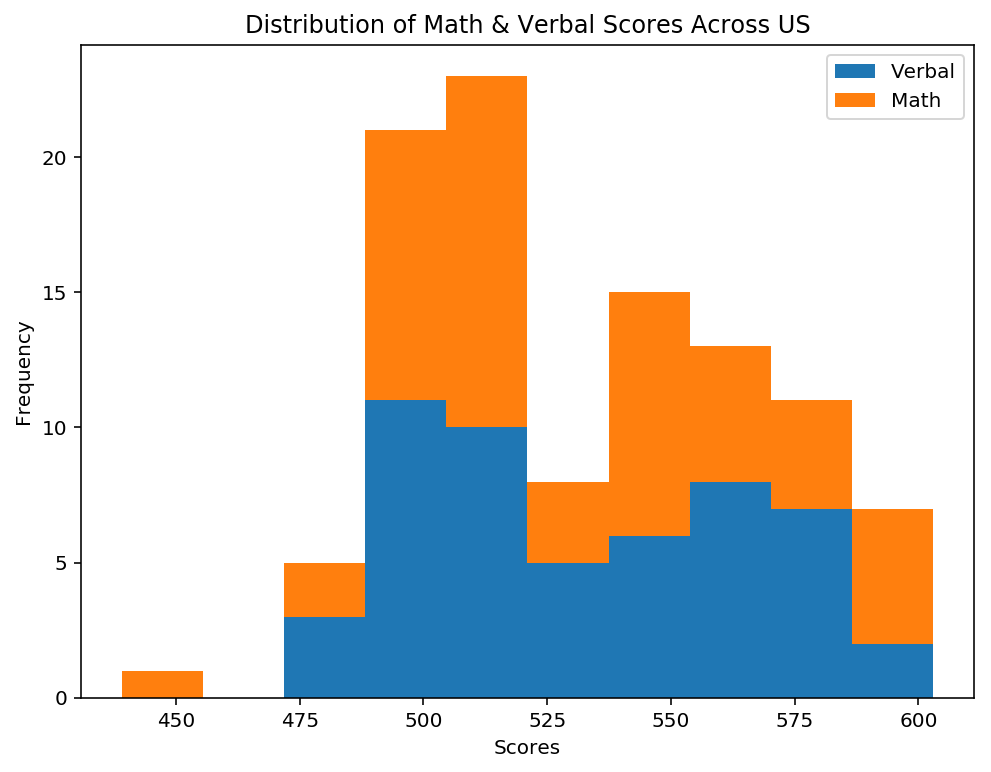

In [15]:
sat_score[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(8,6))
plt.title("Distribution of Math & Verbal Scores Across US")
plt.xlabel("Scores")

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0, 0.5, 'Scores')

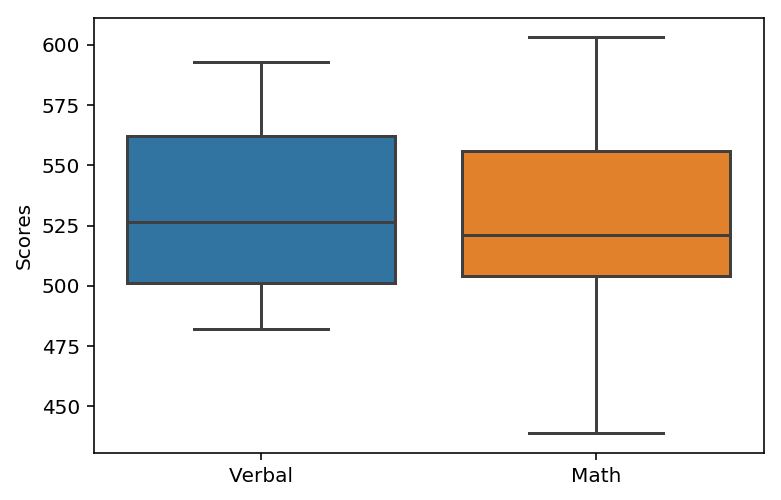

In [16]:
boxplotdf = sat_score[['Verbal', 'Math']]
sns.boxplot(data=boxplotdf)
plt.ylabel("Scores")

# Q1 - Benefits of using boxplot over scatterplot/histogram
# Boxplot can show the min, max, median, 1st and 3rd quartile values 
# Scatterplot/histogram doesn't show the above information clearly
# They are more useful to show the distribution/frequency of the dataset

# Q2 - What's wrong with plotting Rate on same chart as Math & Verbal
# The range of values between Rate and the other values are different.
# Therefore, plotting them on the same chart won't allow for very meaningful comparison of values between them

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [35]:
# Mean of Verbal score is 532.01923
# sat_score['Verbal'].mean()

sat_score[sat_score['Verbal'] > sat_score['Verbal'].mean()].count()
# There were 24 states with Verbal scores above the mean
# This means that there are 28 states with Verbal scores equals to or below the mean
# Since the number of states on each side of the mean don't differ significantly, it tells us that 
# Verbal scores are distribution rather evenly and mean is close to the median
# Distribution has a slight right skew

# List of states with Verbal scores above mean
sat_score[sat_score['Verbal'] > sat_score['Verbal'].mean()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [42]:
# Median of Verbal scores is 526.5
# np.median(sat_score['Verbal'])

# List of states with Verbal scores greater than median Verbal score (26 in total)
sat_score[sat_score['Verbal'] > np.median(sat_score['Verbal'])]

# There are 26 states with Verbal scores higher than median as compared to 24 with Verbal scores higher than mean
# This because mean and median are relatively close in value - Verbal scores are distributed rather evenly

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [84]:
# Creating a new column that is the difference between Verbal and Math scores
sat_score['Score Difference'] = sat_score['Verbal'] - sat_score['Math']
sat_score.head()

,State,Rate,Verbal,Math,Score Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [95]:
# Dataframe 1 - 10 states with greatest gap between Verbal and Math, where Verbal > Math
top10verbalmathgap = sat_score[(sat_score['Score Difference'] > 0)].sort_values(by='Score Difference', ascending=False).head(10)
top10verbalmathgap.head(3)

,State,Rate,Verbal,Math,Score Difference
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [94]:
# Dataframe 2 - 10 states with the greatest gap between Verbal and Math, where Math > Verbal
top10mathverbalgap = sat_score[(sat_score['Score Difference'] < 0)].sort_values(by='Score Difference', ascending=True).head(10)
top10mathverbalgap.head(3)

,State,Rate,Verbal,Math,Score Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


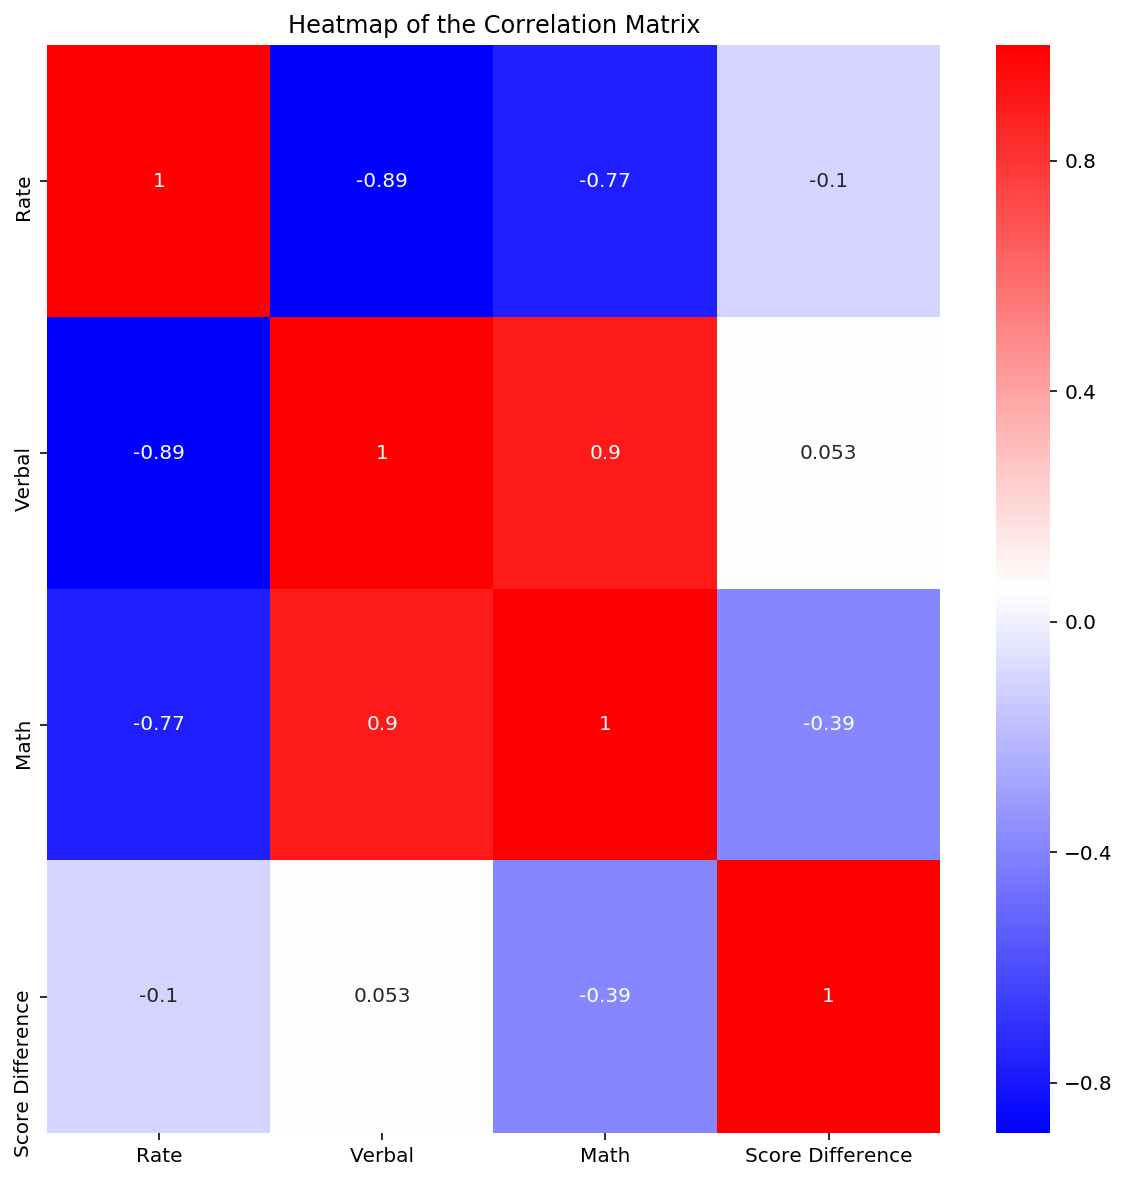

In [87]:
sat_score_corr = sat_score[['Rate', 'Verbal', 'Math', "Score Difference"]]
plt.figure(figsize=(10,10),)
sns.heatmap(sat_score_corr.corr(),cmap='bwr',annot=True)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

# 1 - Participation rate is inversely correlated with Verbal scores. 
# I.e. The lower the participation rate, the higher the Verbal scores
# 2 - Participation rate is inversely correlated with Math scores, albeit to a lower extent than with Verbal scores. 
# I.e. The lower the participation rate, the higher the Math scores.
# 3 - Score difference has a moderate inverse correlation with Math scores (-0.39)
# This is greater than the very slight positive correlation Verbal has with score difference (0.053) 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [96]:
sat_score.describe()
# Count - Counts the number of rows there are for each column
# Mean - Shows the mean value for each column
# Std - Shows the standard deviation for each column
# Min - The minimum value for each column
# 25% - The value that falls on the 1st quartile for each column
# 50% - The value that falls on the 2nd quartile for each column
# 75% - The value that falls on the 3rd quartile for each column
# Max - The max value for each column 

,Rate,Verbal,Math,Score Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [133]:
druguse = '../project-2/drug-use-by-age.csv'
drugusedf = pd.read_csv(druguse, na_values='-')
# I did na_values='-' after discovering that multiple columns had - in place of NaN
drugusedf.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [128]:
drugusedf.shape
# 17 rows, 28 columns

drugusedf.columns
# Column Names:
# age, n, alcohol-use, alcohol-frequency, marijuana-use, marijuana-frequency,
# cocaine-use, cocaine-frequency, crack-use, crack-frequency, heroin-use,
# heroin-frequency, hallucinogen-use, hallucinogen-frequency, inhalant-use,
# inhalant-frequency, pain-releiver-use, pain-releiver-frequency, oxycotin-use,
# oxycontin-frequency, tranquilizer-use, tranquilizer-frequency, stimulant-use,
# stimulant-frequency, meth-use, meth-frequency, sedative-use, sedative-frequency
# Use -- Percentage of people in an age group who used X in the past 12 mths
# Frequency -- Median number of times a user in an age group used X in the past 12 mths
# Age -- Age group
# n -- Number of people in age group

drugusedf.info()
# Null values for cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxytocin-frequency, meth-frequency
# Age is a column that need further examination because the data type is object instead of int/float
# This indicates that there might be strings/symbols in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [159]:
# Age, cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxytocin-frequency, meth-frequency
drugusedf['age']
# For rows 10 - 15, age is given as a range in the form of n1 - n2. 
# For row 16, age is in the form of n+

map = {12:12, 13:13, 14:14, 15:15, 16:16, 17:17, 
       18:18, 19:19, 20:20, 21:21, '22-23':22.5, 
       '24-25':24.5, '26-29':27.5, '30-34':32, '35-49':42,
       '50-64':57, '65+':65}

# Replaced the rows 10-15 of age column with the midpoint of n1-n2
# Replaced row 16 as 65
age = drugusedf['age']
agedf = pd.DataFrame(age)
# applymap has the effect of 'floating' every column as well
agedf = agedf.applymap(lambda s: map.get(float(s)) if s in map else float(s))
drugusedf['age']=agedf
drugusedf

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13.0,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17.0,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18.0,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19.0,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20.0,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21.0,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [160]:
# Checking if I have changed age column to a float type
# All columns except n is float type
drugusedf.dtypes

age                        float64
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [161]:
drugusedf.describe()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,25.617647,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,15.356726,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,27.500000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,65.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

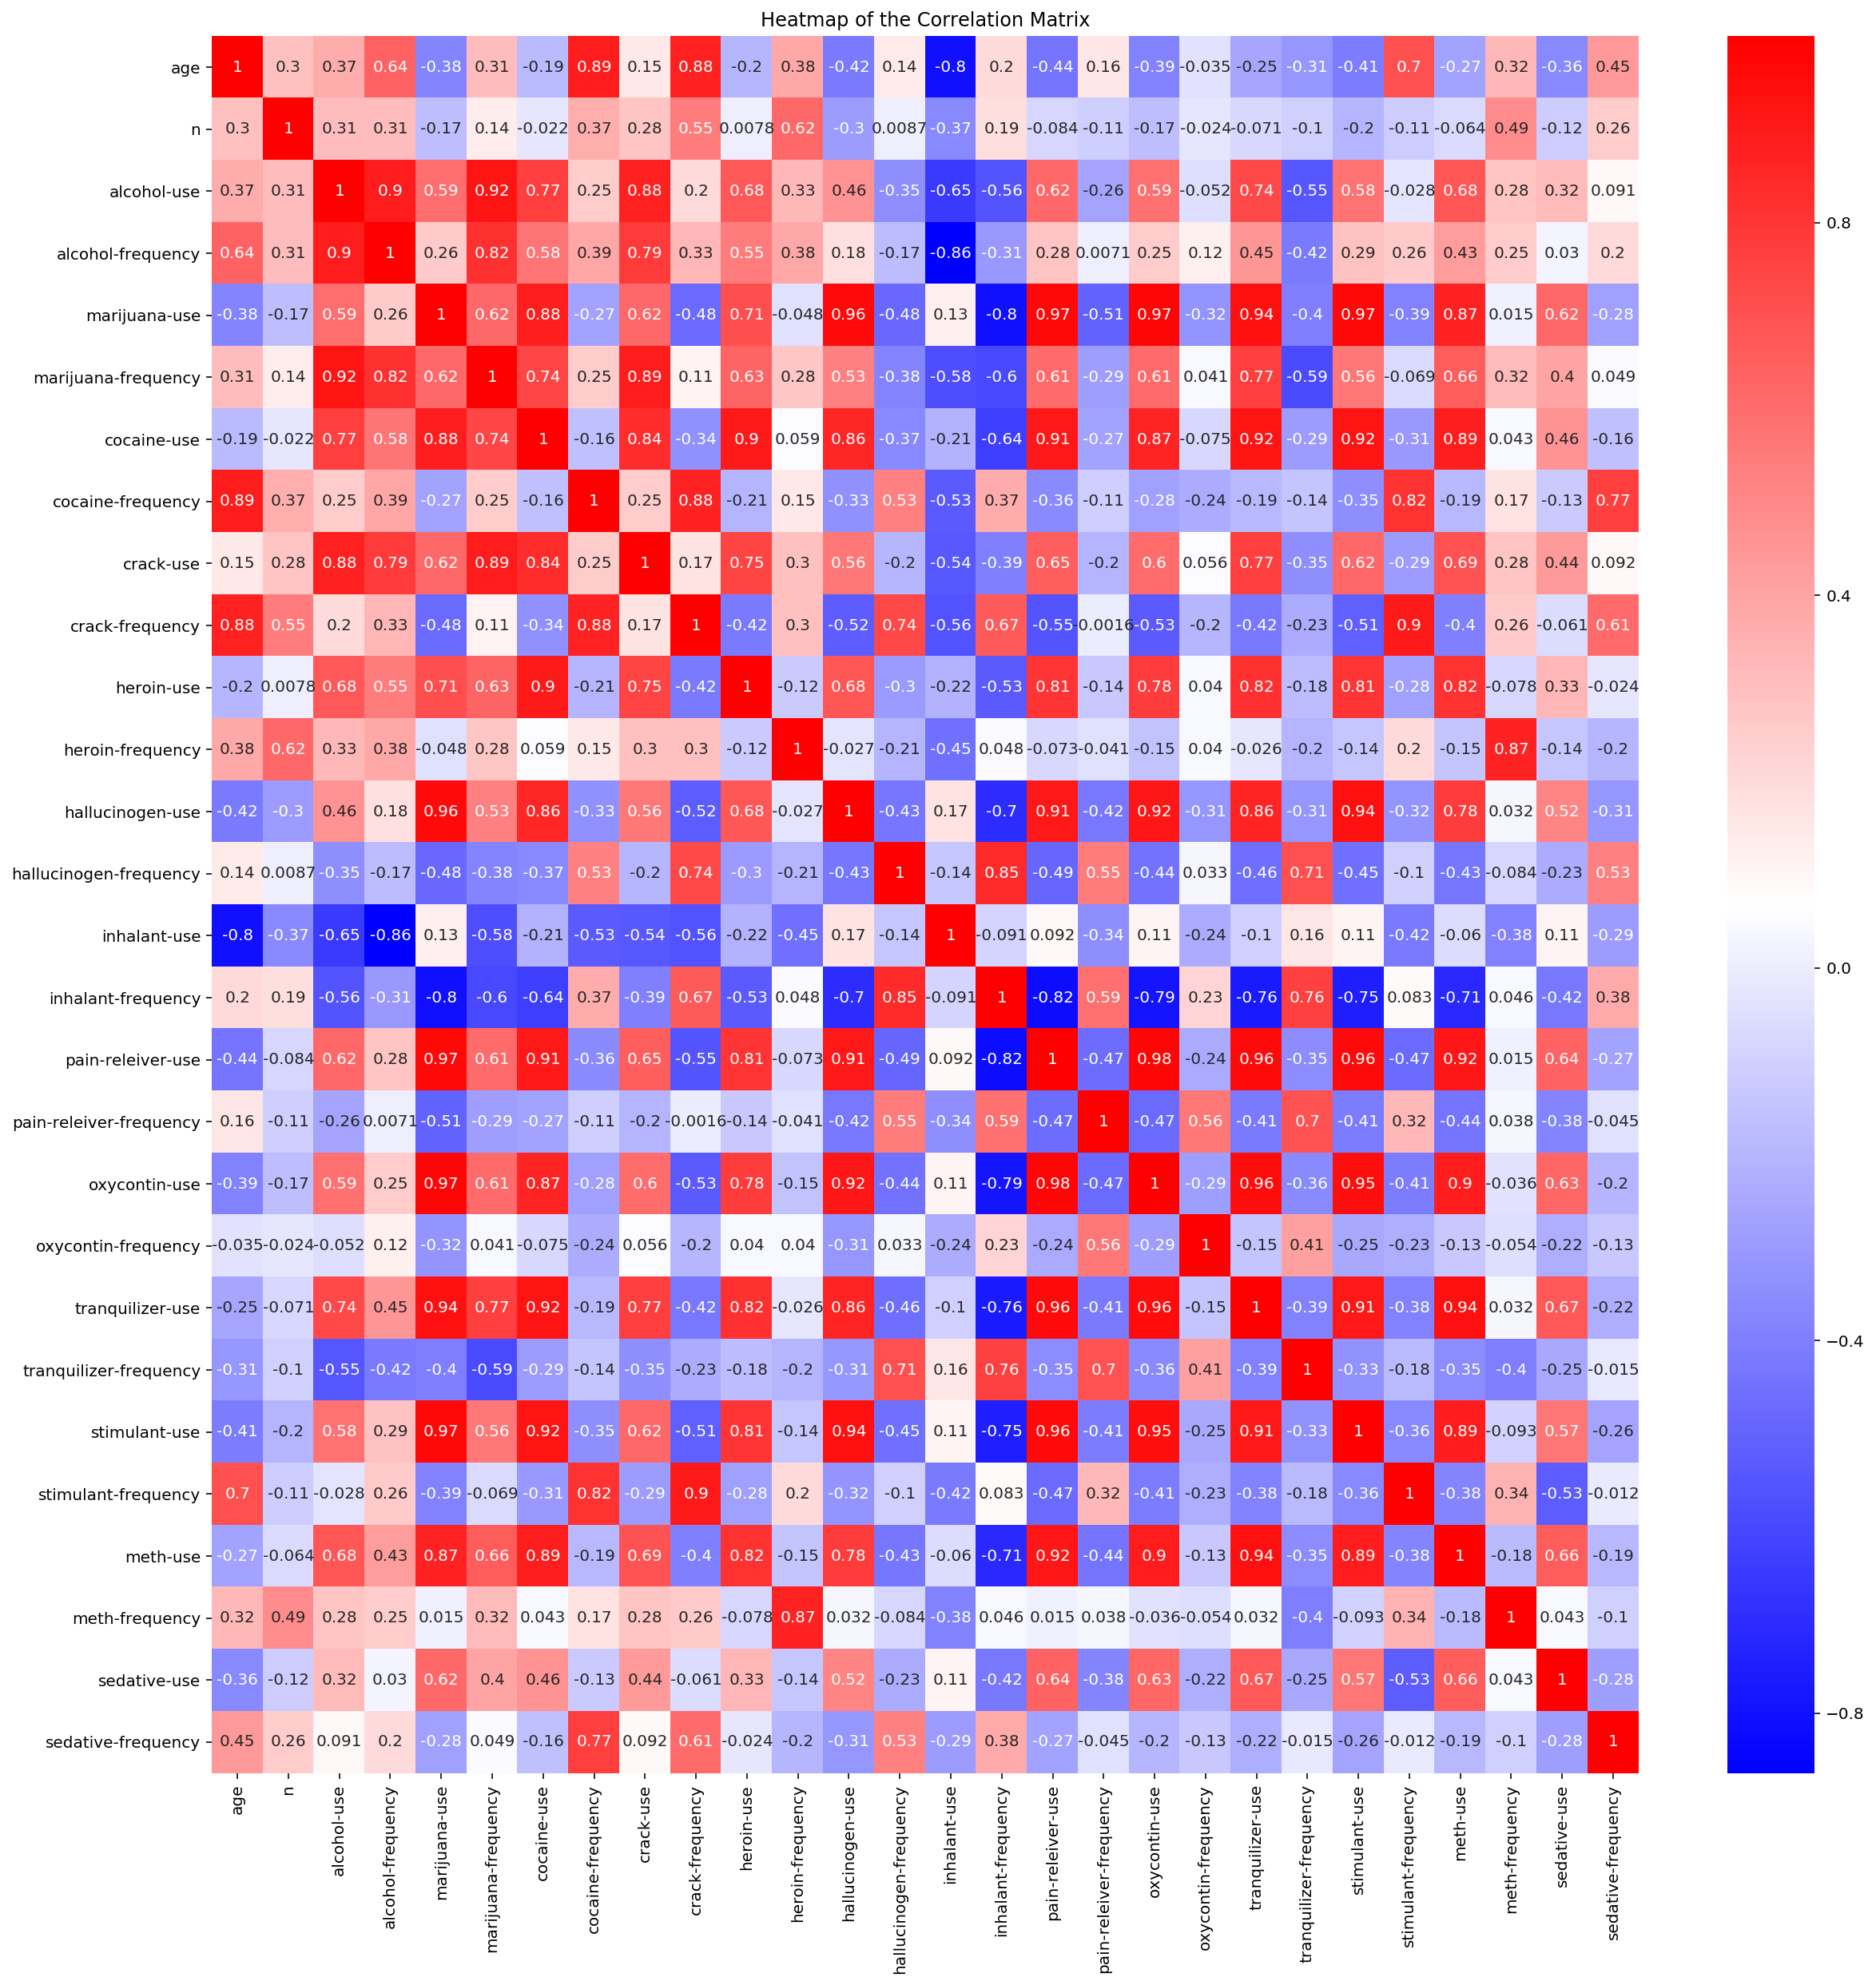

In [162]:
plt.figure(figsize=(20,20))
sns.heatmap(drugusedf.corr(),cmap='bwr',annot=True)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

# Age correlations:
# Summary: In general, as age increases, the percentage of people who use drugs
# decreases. However, for those who are using drugs, their use frequency generally increased
# as age increases. (Except for oxycotin)

# +0.37 Alch-use, + 0.64 Alch-freq -- Older ppl get, more ppl drink, drink more frequently
# -0.38 Mari-use, +0.31 Mari-freq -- Older ppl get, less ppl use mari, but those who use use more
# -0.19 Coca-use, +0.89 Coca-freq -- Same as mari
# +0.15 Crack-use, +0.88 Crack-freq -- Older ppl get, more use crack, use more frequently
# -0.2 Heroin-use, +0.38 Heroin-freq -- Older ppl get, less use heroin, those who use use more
# -0.42 Hallu-use, +0.14 Hallu-freq -- Older ppl get, less use hallu, slightly use more
# -0.8 Inhale-use, +0.2 Hall-freq -- Older ppl get, alot lesser use hallu, slight increase in use freq
# -0.44 Pain-use, +0.16 Pain-freq -- Older ppl get, less use pain, slight increase in use freq
# -0.39 Oxy-use, -0.035 Oxy-freq -- Older ppl get, less use oxy, use less freq
# -0.25 Tranq-use, -0.31 Tranq-freq -- Same as oxy
# -0.41 Stimu-use, +0.7 Stimu-freq -- Older ppl get, less use stimu, but use more freq
# -0.27 Meth-use, +0.32 Meth-freq -- Same as Stimu but to lesser extent
# -0.36 Seda-use, +0.45 Seda-freq -- Same as Meth

# Alchohol freq correlations:
# Summary: Strong positive correlation between alch-freq and mari-freq. Likely because both alchohol and marijuana
# Are consumed in tandem recreationally.
# +0.00 - +0.19: Oxy-freq, Pain-freq
# +0.20 - +0.40: Seda-freq, Meth-freq, Stim-freq, Hero-freq, Coca-freq
# +0.41 - +0.60: 
# +0.61 - +1.00: Mari-freq
# -0.01 - -0.19: Hallu-freq
# -0.20 - -0.40: Inhalant-freq
# -0.41 - -0.60: Tranq-freq
# -0.61 - -1.00: 

# Drug-use correlations
# Summary: In general, all drug-use tend to be positively correlated with one another
# Only exception is inhalent-use

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [193]:
# Question: If there is correlation between age and substance use
# H0 - The correlation between age and alcohol use is 0
# H1 - The correlation between age and alcohol use is > 0

mean_alc_dataset = drugusedf[['age', 'alcohol-use']].corr().mean()
mean_alc_rsample = drugusedf[['age', 'alcohol-use']].sample(10).corr().mean()
mean_difference = mean_alc_dataset - mean_alc_rsample
mean_difference

age            0.016576
alcohol-use    0.016576
dtype: float64

In [194]:
# Calculating the T-statistic
stats.ttest_ind(drugusedf[['age', 'alcohol-use']].corr(), drugusedf[['age', 'alcohol-use']].sample(10).corr())

Ttest_indResult(statistic=array([-0.66957321, -0.66957321]), pvalue=array([0.57207935, 0.57207935]))

In [195]:
t = -0.66953721
p = 0.57207935

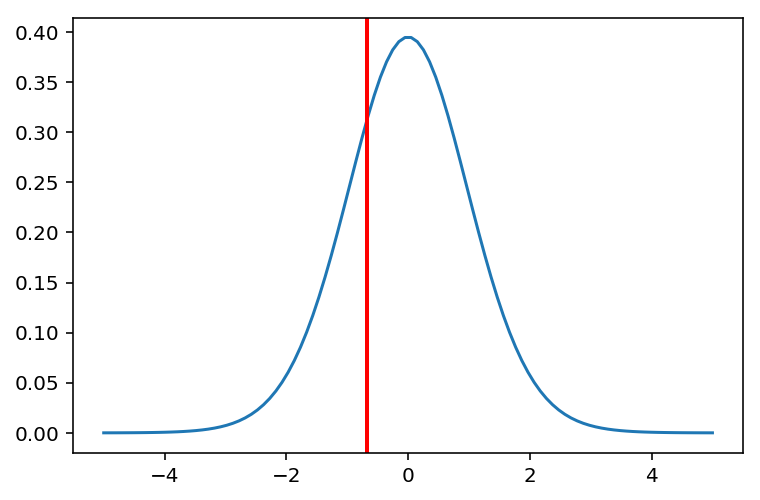

In [196]:
# Plotting the t-statistic on the t-distribution.
x = np.linspace(-5,5,100)
y = stats.t.pdf(x, df=25)


plt.plot(x,y) 
plt.axvline(t,c='red', lw=2)


plt.show()

In [ ]:
# As p value > 0.05, there is weak evidence against H0
# As such, conclusion is that correlation between age and alcohol-use is 0

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.